In [1]:
# Importing the libraries

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

In [2]:
#Importing the Training Set

dataset_train = pd.read_csv("/kaggle/input/stock-price/Google_Stock_Price_Train.csv")

training_set = dataset_train.iloc[ :, 1 : 2 ].values

In [3]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))

training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with one output

X_train = [ ]

y_train = [ ]

for i in range(60, 1258):

    X_train.append(training_set_scaled[i-60 : i, 0])

    y_train.append(training_set_scaled[ i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
#Reshaping

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1 ))

In [6]:
# Importing the Keras libraries and packages

from keras.models import Sequential

from keras.layers import Dense

from keras.layers import LSTM

from keras.layers import Dropout

In [7]:
# Initialising the RNN

regressor = Sequential()

# Step 1 – Adding the 1st LSTM layer and some dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True, input_shape =(X_train.shape[1], 1)))

regressor.add(Dropout(0.2))

# Step 2 - Adding the 2nd LSTM layer and some dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))

regressor.add(Dropout(0.2))

# Step 3 - Adding the 3rd LSTM layer and some dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))

regressor.add(Dropout(0.2))

# Step 4 - Adding the 4th LSTM layer and some dropout regularisation

regressor.add(LSTM(units = 50))

regressor.add(Dropout(0.2))

# Step 5 – Adding Output Layer

regressor.add(Dense(units = 1))

In [8]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [9]:
regressor.fit (X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 13s 109ms/step - loss: 0.0429
Epoch 2/10
38/38 [==============================] - 4s 115ms/step - loss: 0.0059
Epoch 3/10
38/38 [==============================] - 4s 115ms/step - loss: 0.0059
Epoch 4/10
38/38 [==============================] - 4s 111ms/step - loss: 0.0053
Epoch 5/10
38/38 [==============================] - 4s 112ms/step - loss: 0.0050
Epoch 6/10
38/38 [==============================] - 4s 112ms/step - loss: 0.0050
Epoch 7/10
38/38 [==============================] - 4s 109ms/step - loss: 0.0048
Epoch 8/10
38/38 [==============================] - 4s 112ms/step - loss: 0.0041
Epoch 9/10
38/38 [==============================] - 4s 111ms/step - loss: 0.0048
Epoch 10/10
38/38 [==============================] - 4s 118ms/step - loss: 0.0045


In [10]:
# Getting the Real Stock Price of 2017

dataset_test = pd.read_csv('/kaggle/input/stock-price/Google_Stock_Price_Test.csv')

real_stock_price = dataset_test.iloc[:, 1:2].values

In [11]:
# Getting the Predicted Stock Price of 2017

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60: ].values

inputs = inputs.reshape( -1, 1)

inputs = sc.transform(inputs)

X_test = [ ]

for i in range(60, 80) :

    X_test.append(inputs[ i-60 : i, 0])

X_test = np.array(X_test)

X_test = np.reshape( X_test, (X_test.shape[0], X_test.shape[1], 1 ))

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


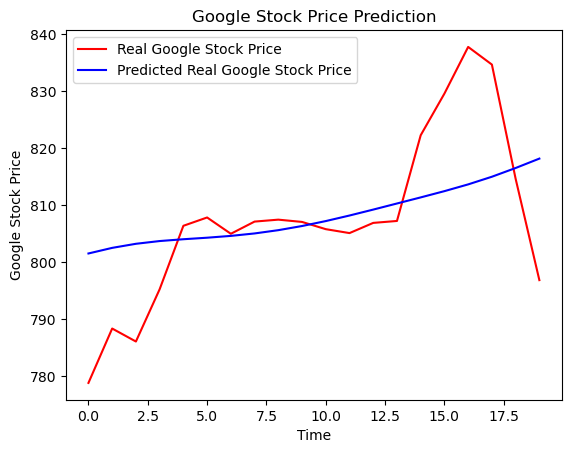

In [12]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')

plt.plot(predicted_stock_price, color = 'Blue', label = 'Predicted Real Google Stock Price')

plt.title( 'Google Stock Price Prediction')

plt.xlabel ('Time')

plt.ylabel ('Google Stock Price')

plt.legend()

plt.show()